### Example 1

In the first example, we will be clustering the X numpy array of data points.

##### Method 1: Hierarchical Clustering

In [8]:
import numpy as np # Import Numpy library.

X = np.array([[5,3], [10,15], [15,12], [24,10], [30,30], [85,70], [71,80], [60,78], [70,55], [80,91],])

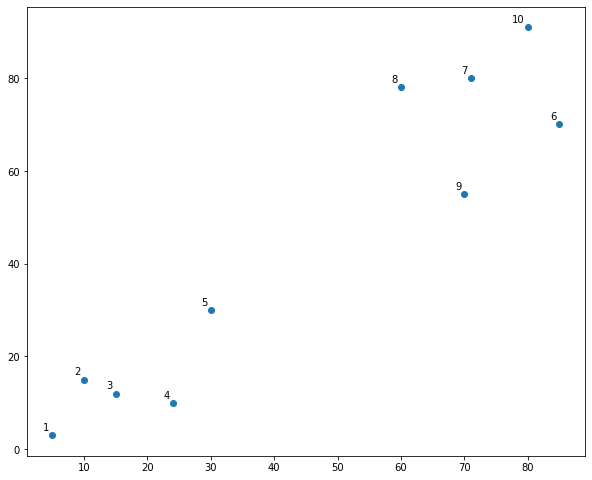

In [9]:
# import matplotlib library for the plotting
import matplotlib.pyplot as plt 

# plot the array using scatter plot to understand the position of the data

labels = range(1, 11)
plt.figure(figsize=(10, 8))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0], X[:,1], label = 'True Position')

for label, x, y in zip(labels, X[:,0], X[:,1]):
    plt.annotate(label, xy= (x, y), xytext = (-3, 3), textcoords = 'offset points', ha = 'right', va = 'bottom')
    
plt.show()

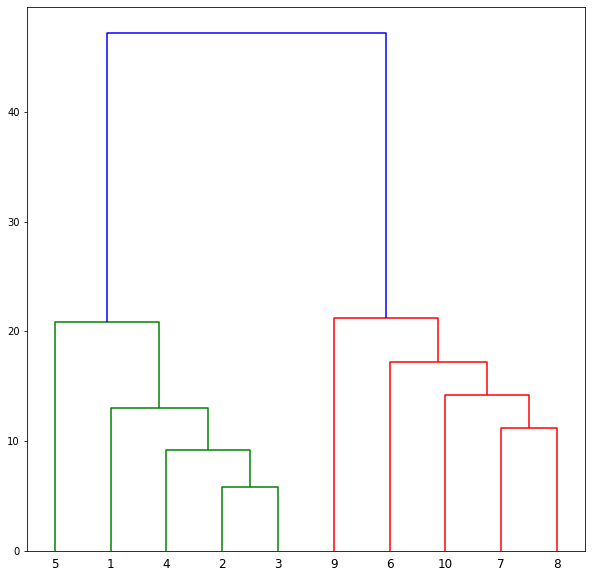

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, method = 'single')

label_list = range(1, 11)

plt.figure(figsize = (10, 10))
dendrogram(linked, orientation = 'top', labels = label_list, distance_sort = 'descending', show_leaf_counts=True)
plt.show()

##### Method 2: AgglomerativeClustering

###### Ex.1

In [11]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


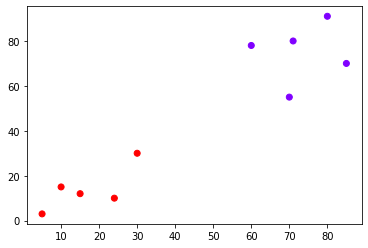

In [13]:
plt.scatter(X[:,0], X[:,1], c = cluster.labels_, cmap = 'rainbow')
plt.show()

###### Ex. 2

The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends.

In [24]:
import pandas as pd
data = pd.read_csv('https://stackabuse.s3.amazonaws.com/files/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')
data.index = data['CustomerID']
data = data.drop('CustomerID', axis = 1)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [27]:
data.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [25]:
data.shape

(200, 4)

1. We need only 2 features in order to visualize the cluster data. we will consider data with annul income & spending score.
2. We will create a final dataset along with only these 2 features

In [28]:
f_data = data[['Annual Income (k$)', 'Spending Score (1-100)']]
f_data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


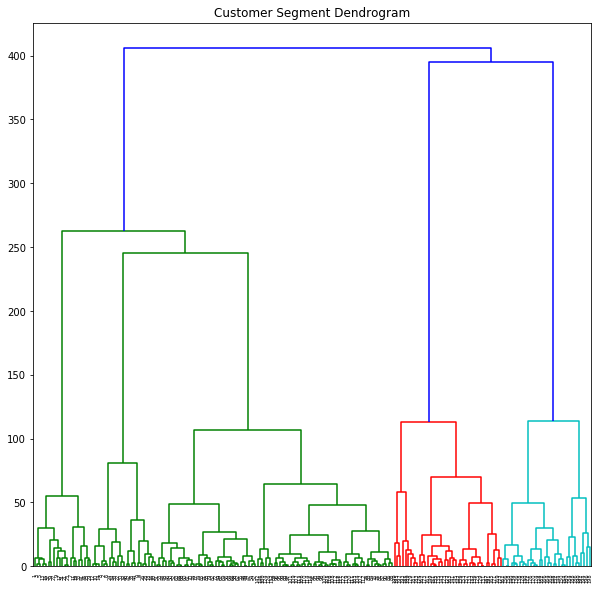

In [29]:
plt.figure(figsize = (10,10))
plt.title('Customer Segment Dendrogram')

dendrogram = dendrogram(linkage(f_data, method = 'ward'))

In [30]:
cluster1 = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage='ward')
cluster1.fit_predict(f_data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

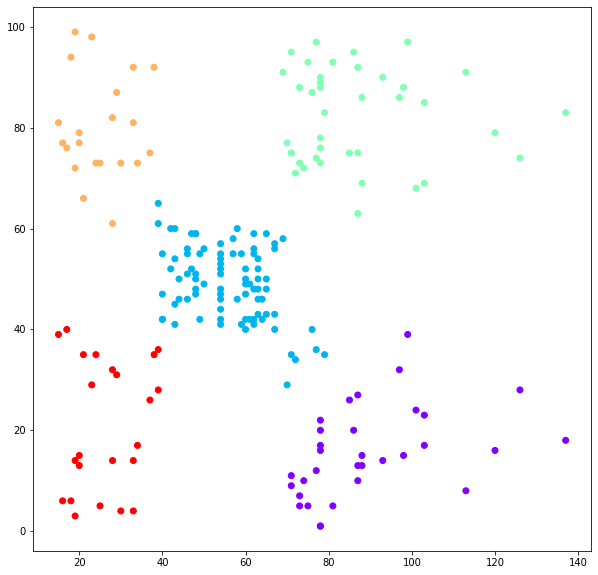

In [37]:
plt.figure(figsize=(10, 10))
plt.scatter(f_data['Annual Income (k$)'], f_data['Spending Score (1-100)'], c = cluster1.labels_, cmap = 'rainbow')
plt.show()